In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')
dataset.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [3]:
dataset.describe(include="all")


,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


In [4]:
dataset['custcat'].value_counts().to_frame()

,count
custcat,
3,281
1,266
4,236
2,217


(array([266.,   0.,   0., 217.,   0.,   0., 281.,   0.,   0., 236.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

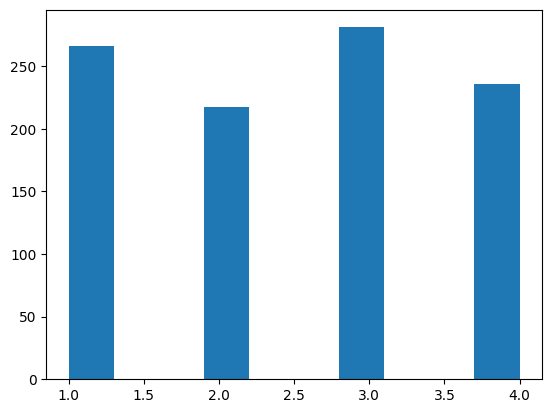

In [5]:
plt.hist(dataset.custcat)

In [6]:
dataset.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [7]:
dataset['custcat'].isnull().sum()

0

In [8]:
dataset.custcat.value_counts().sum()

1000

In [10]:
dataset.dtypes

region       int64
tenure       int64
age          int64
marital      int64
address      int64
income     float64
ed           int64
employ       int64
retire     float64
gender       int64
reside       int64
custcat      int64
dtype: object

In [13]:
dataset = dataset.astype('Float64')


In [14]:
dataset.dtypes

region     Float64
tenure     Float64
age        Float64
marital    Float64
address    Float64
income     Float64
ed         Float64
employ     Float64
retire     Float64
gender     Float64
reside     Float64
custcat    Float64
dtype: object

In [15]:
X = dataset[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside']].values

In [16]:
Y = dataset[['custcat']]

NORMALIZATION IN THIS CASE BEACUSE OF THE USE OF THE KNN:

In [21]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X

array([[-0.02696767, -1.055125  ,  0.18450456, ..., -0.22207644,
        -1.03459817, -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243, ..., -0.22207644,
        -1.03459817,  2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601, ..., -0.22207644,
         0.96655883, -0.23065004],
       ...,
       [ 1.19883553,  1.47425216,  1.37948227, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  1.61477311,  0.58283046, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  0.67796676, -0.45281689, ..., -0.22207644,
         0.96655883,  0.46617787]])

In [31]:
from sklearn.model_selection import train_test_split
trainx,testx,trainy,testy = train_test_split(X,Y,test_size=0.2, random_state=4)
print("the size of the train", trainx.shape, trainy.shape)
print("the size of the test", testx.shape, testy.shape)


the size of the train (800, 11) (800, 1)
the size of the test (200, 11) (200, 1)


In [32]:
from sklearn.neighbors import KNeighborsClassifier

TRAINING:

In [56]:
neigh = KNeighborsClassifier(n_neighbors = 9).fit(trainx,trainy)
neigh

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=9)

In [57]:
pred_y = neigh.predict(testx)
pred_y[0:4]

array([3., 1., 3., 2.])

Evaluation metrics:JAccord score in this case

In [58]:
from sklearn import metrics
print("THe accuracy of the model is; ", metrics.accuracy_score(testy, pred_y))

THe accuracy of the model is;  0.34
